In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

from IPython.display import HTML, display, IFrame

# Lecture 7 –  Data Visualization 📈
## DSC 10, Fall 2022

### Announcements

- Lab 2 is due on **Saturday 10/8 at 11:59pm**.
- Homework 2 is due on **Tuesday 10/11 at 11:59pm**.
- Take a look at the [solutions notebook](https://dsc10.com/resources/lectures/lec06/lec06solutions.html) and [supplemental video](https://youtu.be/xg7rnjWnZ48) for Lecture 6.

### Agenda

- Why visualize?
- Terminology.
- Scatter plots.
- Line plots.
- Bar charts.

Don't forget about the [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view) and the [Resources tab of the course website](https://dsc10.com/resources/)!

### Aside: keyboard shortcuts

There are several keyboard shortcuts built into Jupyter Notebooks designed to help you save time. To see them, either click the keyboard button in the toolbar above or hit the H key on your keyboard (as long as you're not actively editing a cell).

Particularly useful shortcuts:

| Action | Keyboard shortcut |
| --- | --- |
| Run cell + jump to next cell | SHIFT + ENTER |
| Save the notebook | CTRL/CMD + S |
| Create new cell above/below | A/B |
| Delete cell | DD |
| Convert cell to Markdown | M |
| Convert cell to code | Y |

Note: the latter three only work if you're not actively editing a cell (to exit "edit mode", click somewhere outside of a cell).

## Why visualize?

Run these cells to load the _Little Women_ data from Lecture 1.

In [2]:
chapters = open('data/lw.txt').read().split('CHAPTER ')[1:]

In [3]:
# Counts of names in the chapters of Little Women

counts = bpd.DataFrame().assign(
    Amy=np.char.count(chapters, 'Amy'),
    Beth=np.char.count(chapters, 'Beth'),
    Jo=np.char.count(chapters, 'Jo'),
    Meg=np.char.count(chapters, 'Meg'),
    Laurie=np.char.count(chapters, 'Laurie'),
)

# cumulative number of times each name appears

lw_counts = bpd.DataFrame().assign(
    Amy=np.cumsum(counts.get('Amy')),
    Beth=np.cumsum(counts.get('Beth')),
    Jo=np.cumsum(counts.get('Jo')),
    Meg=np.cumsum(counts.get('Meg')),
    Laurie=np.cumsum(counts.get('Laurie')),
    Chapter=np.arange(1, 48, 1)
)

lw_counts

,Amy,Beth,Jo,Meg,Laurie,Chapter
0,23,26,44,26,0,1
1,36,38,65,46,0,2
2,38,40,127,82,16,3
...,...,...,...,...,...,...
44,633,461,1450,675,581,45
45,635,462,1506,679,583,46
46,645,465,1543,685,596,47


### Little Women

In Lecture 1, we were able to answer questions about the plot of _Little Women_ without having to read the novel. Some of those questions included:

- Who is the main character?
- Which pair of characters gets married in Chapter 35?

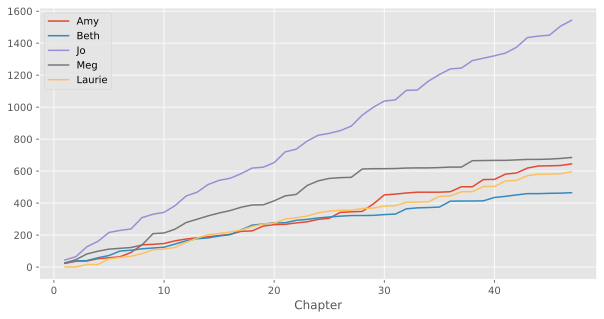

In [4]:
lw_counts.plot(x='Chapter');

### Napoleon's March

<center><img src="./data/minard.jpg"/></center>

### John Snow

<center><img src='data/map.jpg'></center>

### Why visualize?

- Computers are better than humans at crunching numbers, but humans are better at identifying visual patterns.

- Visualizations allow us to understand lots of data quickly – they make it easier to spot trends and communicate our results with others.

- There are many types of visualizations; in this class, we'll look at scatter plots, line plots, bar charts, and histograms, but there are many others.
    - The right choice depends on the type of data.

## Terminology

### Individuals and variables

<center><img src='data/ind-var.png' width=90%/></center>

- <span style="color:#6d9eeb"><b>Individual (row):</b></span> Person/place/thing for which data is recorded. Also called an **observation**.

- <span style="color:#ff9900"><b>Variable (column):</b></span> Something that is recorded for each individual. Also called a **feature**.

### Types of variables

There are two main types of variables:

- **Numerical**: It makes sense to do arithmetic with the values.
- **Categorical**: Values fall into categories, that may or may not have some _order_ to them.

### Examples of numerical variables

- Salaries of NBA players 🏀.
    - Individual: an NBA player.
    - Variable: their salary.

- Movie gross earnings 💰.
    - Individual: a movie.
    - Variable: its gross earnings.

- Booster doses administered per day 💉.
    - Individual: date.
    - Variable: number of booster doses administered on that date.

### Examples of categorical variables

- Movie genres 🎬.
    - Individual: a movie.
    - Variable: its genre.

- Zip codes 🏠.
    - Individual: US resident.
    - Variable: zip code.
        - Even though they look like numbers, zip codes are categorical (arithmetic doesn't make sense).

- Level of prior programming experience for students in DSC 10 🧑‍🎓.
    - Individual: student in DSC 10.
    - Variable: their level of prior programming experience, e.g. none, low, medium, or high. 
        - There is an _order_ to these categories!

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

Which of these is **not** a numerical variable?

A. Fuel economy in miles per gallon.

B. Number of quarters at UCSD.

C. College at UCSD (Sixth, Seventh, etc).

D. Bank account number.

E. More than one of these are not numerical variables.

### Types of visualizations

The type of visualization we create depends on the kinds of variables we're visualizing.

- **Scatter plot**: numerical vs. numerical.
- **Line plot**: sequential numerical (time) vs. numerical.
- **Bar chart**: categorical vs. numerical.
- **Histogram**: numerical.
    - Will cover next time.
    
**Note:** We may interchange the words "plot", "chart", and "graph"; they all mean the same thing.

## Scatter plots

### Dataset of 50 top-grossing actors

|Column |Contents|
|----------|------------|
`'Actor'`|Name of actor
`'Total Gross'`|	Total gross domestic box office receipt, in millions of dollars, of all of the actor’s movies
`'Number of Movies'`|	The number of movies the actor has been in
`'Average per Movie'`|	Total gross divided by number of movies
`'#1 Movie'`|	The highest grossing movie the actor has been in
`'Gross'`|	Gross domestic box office receipt, in millions of dollars, of the actor’s #1 Movie

In [6]:
actors = bpd.read_csv('data/actors.csv').set_index('Actor')
actors

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
...,...,...,...,...,...
Sandra Bullock,2462.6,35,70.4,Minions,336.0
Chris Evans,2457.8,23,106.9,The Avengers,623.4
Anne Hathaway,2416.5,25,96.7,The Dark Knight Rises,448.1


### Scatter plots

What is the relationship between `'Number of Movies'` and `'Total Gross'`?

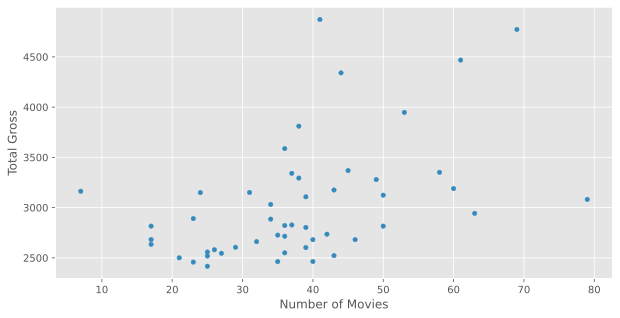

In [7]:
actors.plot(kind='scatter', x='Number of Movies', y='Total Gross');

### Scatter plots

- Scatter plots visualize the relationship between two numerical variables.
- To create one from a DataFrame `df`, use
```
df.plot(
    kind='scatter', 
    x=x_column_for_horizontal, 
    y=y_column_for_vertical
)
```
- The resulting scatter plot has one point per row of `df`.
- If you put a semicolon after a call to `.plot`, it will hide the weird text output that displays.

### Scatter plots

What is the relationship between `'Number of Movies'` and `'Average per Movie'`?

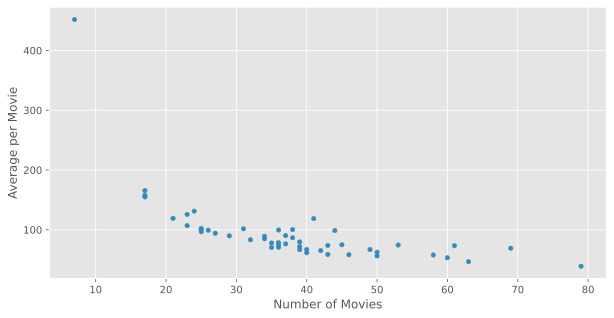

In [8]:
actors.plot(kind='scatter', x='Number of Movies', y='Average per Movie');

Note that in the above plot, there's a _negative_ association and an outlier.

### Who was in 60 or more movies?

In [9]:
actors[actors.get('Number of Movies') >= 60]

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Bruce Willis,3189.4,60,53.2,Sixth Sense,293.5
Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


### Who is the outlier?

Whoever they are, they made very few, high grossing movies.

In [10]:
actors[actors.get('Number of Movies') < 10]

,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Actor,,,,,
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


### Anthony Daniels

<center><img src='data/c3po.png' width=200></center>

## Line plots 📉

### Dataset aggregating movies by year

|Column|	Content|
|------|-----------|
`'Year'`|	Year
`'Total Gross in Billions'`|	Total domestic box office gross, in billions of dollars, of all movies released
`'Number of Movies'`|	Number of movies released
`'#1 Movie'`|	Highest grossing movie

In [11]:
movies_by_year = bpd.read_csv('data/movies_by_year.csv').set_index('Year')
movies_by_year

,Total Gross in Billions,Number of Movies,#1 Movie
Year,,,
2022,5.64,380,Top Gun: Maverick
2021,4.48,439,Spider-Man: No Way Home
2020,2.11,456,Bad Boys for Life
...,...,...,...
1979,1.23,40,Superman
1978,0.83,13,Grease
1977,0.44,9,Star Wars: Episode IV - A New Hope


### Line plots

How has the number of movies changed over time? 🤔

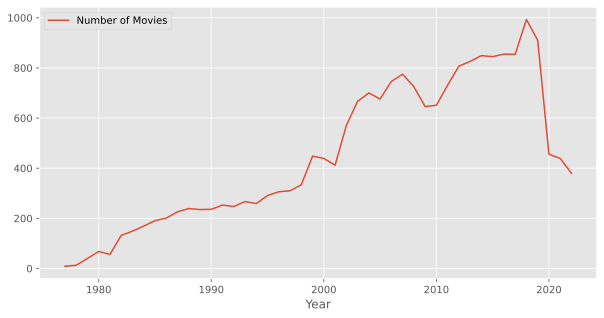

In [12]:
movies_by_year.plot(kind='line', y='Number of Movies');

### Line plots

- Line plots show trends in numerical variables over time.
- To create one from a DataFrame `df`, use
```
df.plot(
    kind='line', 
    x=x_column_for_horizontal, 
    y=y_column_for_vertical
)
```

### Plotting tip

- **Tip**: if you want the x-axis to be the index, omit the `x=` argument!
- Doesn't work for scatter plots, but works for most other plot types.

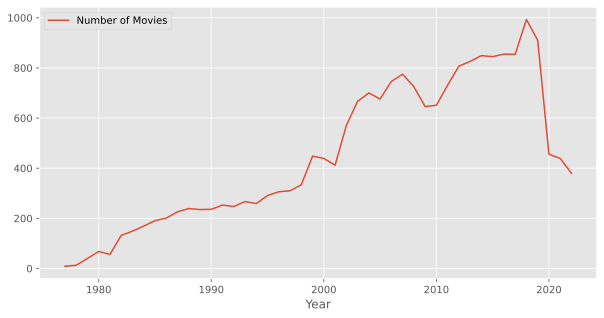

In [17]:
movies_by_year.plot(kind='line', y='Number of Movies');

### Since the year 2000

We can create a line plot of just 2000 onwards by querying `movies_by_year` before calling `.plot`.

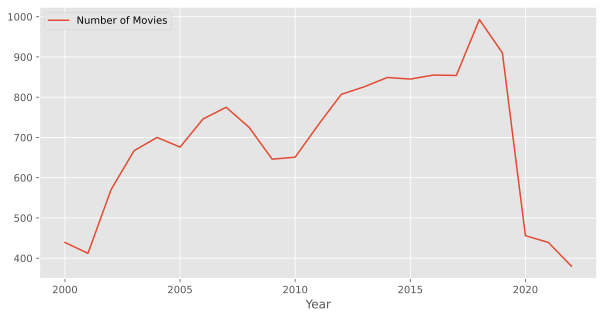

In [18]:
movies_by_year[movies_by_year.index >= 2000].plot(kind='line', y='Number of Movies');

What do you think explains the declines around 2008 and 2020?

### How did this affect total gross?

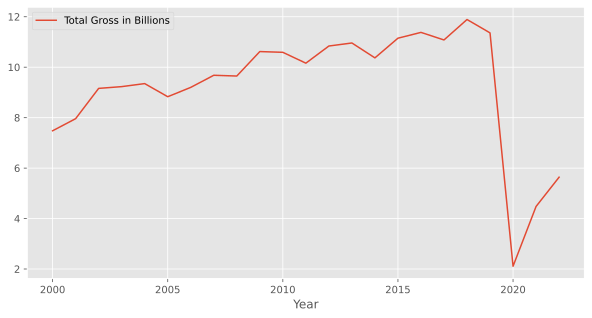

In [19]:
movies_by_year[movies_by_year.index >= 2000].plot(kind='line', y='Total Gross in Billions');

### What was the top grossing movie of 2016? 🐟

In [27]:
movies_by_year[movies_by_year.index == 2016].get('#1 Movie').iloc[0]

'Finding Dory'

## Bar charts 📊

### Dataset of the global top 200 songs on Spotify as of Tuesday (10/4/22)

[Downloaded from here – check it out!](https://spotifycharts.com/regional)

In [28]:
charts = (bpd.read_csv('data/regional-global-daily-2022-10-04.csv')
          .set_index('rank')
          .get(['track_name', 'artist_names', 'streams', 'uri'])
         )
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",7921301,spotify:track:3nqQXoyQOWXiESFLlDF1hG
2,I'm Good (Blue),"David Guetta, Bebe Rexha",4708193,spotify:track:4uUG5RXrOk84mYEfFvj3cK
3,As It Was,Harry Styles,4608998,spotify:track:4Dvkj6JhhA12EX05fT7y2e
...,...,...,...,...
198,There's Nothing Holdin' Me Back,Shawn Mendes,848871,spotify:track:7JJmb5XwzOO8jgpou264Ml
199,Heartless,Kanye West,841645,spotify:track:4EWCNWgDS8707fNSZ1oaA5
200,Mr. Brightside,The Killers,838350,spotify:track:003vvx7Niy0yvhvHt4a68B


### Bar charts

How many streams do the top 10 songs have?

In [29]:
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",7921301,spotify:track:3nqQXoyQOWXiESFLlDF1hG
2,I'm Good (Blue),"David Guetta, Bebe Rexha",4708193,spotify:track:4uUG5RXrOk84mYEfFvj3cK
3,As It Was,Harry Styles,4608998,spotify:track:4Dvkj6JhhA12EX05fT7y2e
...,...,...,...,...
198,There's Nothing Holdin' Me Back,Shawn Mendes,848871,spotify:track:7JJmb5XwzOO8jgpou264Ml
199,Heartless,Kanye West,841645,spotify:track:4EWCNWgDS8707fNSZ1oaA5
200,Mr. Brightside,The Killers,838350,spotify:track:003vvx7Niy0yvhvHt4a68B


In [30]:
charts.take(np.arange(10))

,track_name,artist_names,streams,uri
rank,,,,
1,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",7921301,spotify:track:3nqQXoyQOWXiESFLlDF1hG
2,I'm Good (Blue),"David Guetta, Bebe Rexha",4708193,spotify:track:4uUG5RXrOk84mYEfFvj3cK
3,As It Was,Harry Styles,4608998,spotify:track:4Dvkj6JhhA12EX05fT7y2e
...,...,...,...,...
8,Me Porto Bonito,"Bad Bunny, Chencho Corleone",3605144,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
9,I Ain't Worried,OneRepublic,3521848,spotify:track:4h9wh7iOZ0GGn8QVp4RAOB
10,Bad Habit,Steve Lacy,3178653,spotify:track:4k6Uh1HXdhtusDW5y8Gbvy


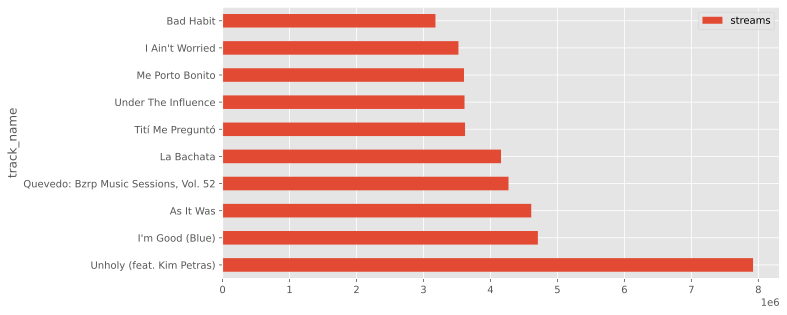

In [31]:
charts.take(np.arange(10)).plot(kind='barh', x='track_name', y='streams');

### Bar charts

- Bar charts visualize the relationship between a categorical variable and a numerical variable.
- In a bar chart...
    - The thickness and spacing of bars is arbitrary.
    - The order of the categorical labels doesn't matter.
- To create one from a DataFrame `df`, use
```
df.plot(
    kind='barh', 
    x=categorical_column_name, 
    y=numerical_column_name
)
```
- The **"h"** in `'barh'` stands for **"horizontal"**.
    - It's easier to read labels this way.
- In the previous chart, we set `y='Streams'` even though streams are measured by x-axis length.

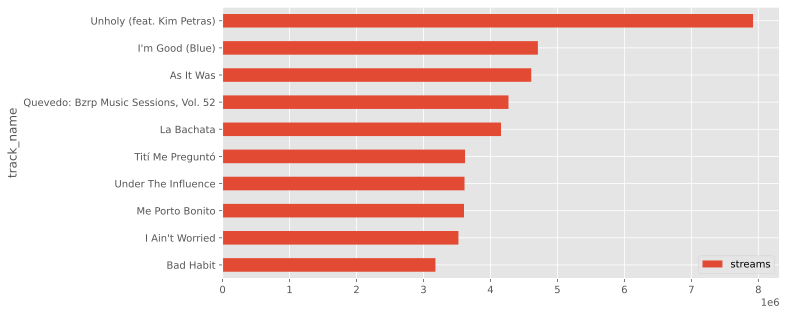

In [32]:
# The bars appear in the opposite order relative to the DataFrame
(charts
 .take(np.arange(10))
 .sort_values(by='streams')
 .plot(kind='barh', x='track_name', y='streams')
);

### How many songs do the top 15 artists have in the top 200?

First, let's create a DataFrame with a single column that describes the number of songs in the top 200 per artist. This involves using `.groupby` with `.count()`. Since we want one row per artist, we will group by `'artist_names'`.

In [33]:
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",7921301,spotify:track:3nqQXoyQOWXiESFLlDF1hG
2,I'm Good (Blue),"David Guetta, Bebe Rexha",4708193,spotify:track:4uUG5RXrOk84mYEfFvj3cK
3,As It Was,Harry Styles,4608998,spotify:track:4Dvkj6JhhA12EX05fT7y2e
...,...,...,...,...
198,There's Nothing Holdin' Me Back,Shawn Mendes,848871,spotify:track:7JJmb5XwzOO8jgpou264Ml
199,Heartless,Kanye West,841645,spotify:track:4EWCNWgDS8707fNSZ1oaA5
200,Mr. Brightside,The Killers,838350,spotify:track:003vvx7Niy0yvhvHt4a68B


In [34]:
songs_per_artist = charts.groupby('artist_names').count()
songs_per_artist

,track_name,streams,uri
artist_names,,,
Adele,1,1,1
Arctic Monkeys,4,4,4
Armani White,1,1,1
...,...,...,...
Zach Bryan,1,1,1
d4vd,1,1,1
girl in red,1,1,1


Using `.sort_values` and `.take`, we'll keep just the top 15 artists. Note that all columns in `songs_per_artist` contain the same information (this is a consequence of using `.count()`).

In [35]:
top_15_artists = (songs_per_artist
                  .sort_values('streams', ascending=False)
                  .take(np.arange(15)))
top_15_artists

,track_name,streams,uri
artist_names,,,
Bad Bunny,9,9,9
The Weeknd,5,5,5
Ed Sheeran,5,5,5
...,...,...,...
BLACKPINK,3,3,3
Imagine Dragons,3,3,3
Bruno Mars,2,2,2


Using `.assign` and `.drop`, we'll create a column named `'count'` that contains the same information that the other 3 columns contain, and then `.get` only that column (or equivalently, drop the other 3 columns).

In [36]:
# If we give .get a list, it will return a DataFrame instead of a Series!
top_15_artists = (top_15_artists
                  .assign(count=top_15_artists.get('streams'))
                  .get(['count']))
top_15_artists

,count
artist_names,
Bad Bunny,9
The Weeknd,5
Ed Sheeran,5
...,...
BLACKPINK,3
Imagine Dragons,3
Bruno Mars,2


Before calling `.plot(kind='barh', y='count')`, we'll sort `top_15_artists` by `'count'` in **increasing** order. This is because, weirdly, Python reverses the order of rows when creating bars in horizontal bar charts.

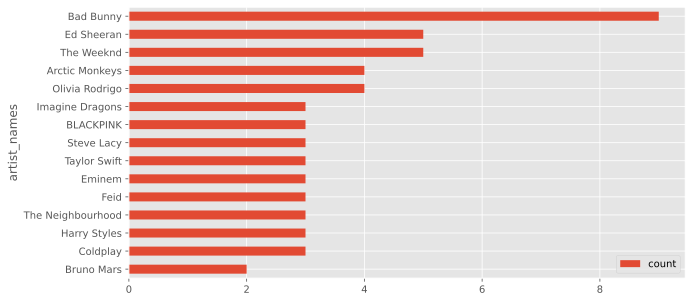

In [37]:
top_15_artists.sort_values(by='count').plot(kind='barh', y='count');

### Vertical bar charts

To create a vertical bar chart, use `kind='bar'` instead of `kind='barh'`. These are typically harder to read, though.

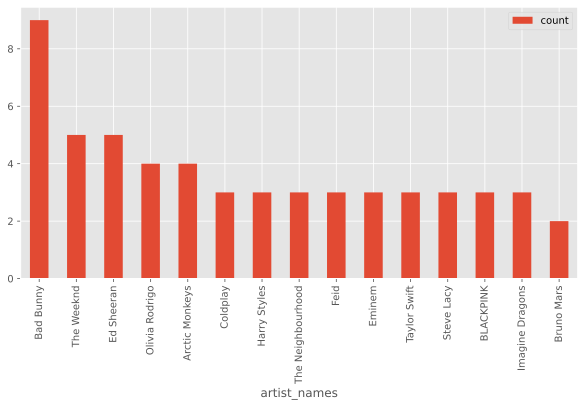

In [38]:
top_15_artists.plot(kind='bar', y='count');

### Aside: How many streams did Justin Bieber's songs on the chart receive?

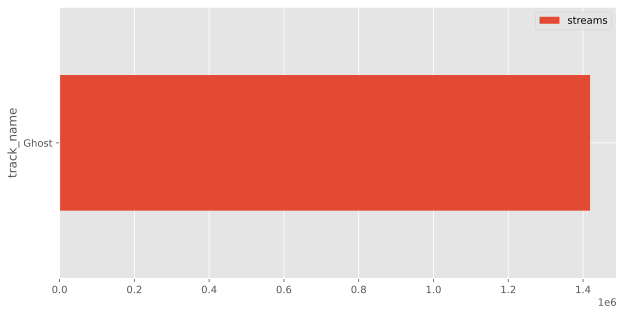

In [39]:
(charts
 [charts.get('artist_names') == 'Justin Bieber']
 .sort_values('streams')
 .plot(kind='barh', x='track_name', y='streams')
);

It seems like we're missing a popular song...

### How do we include featured songs, as well?

Answer: Using `.str.contains`.

In [40]:
bieber = charts[charts.get('artist_names').str.contains('Justin Bieber')]
bieber

,track_name,artist_names,streams,uri
rank,,,,
29,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",2069641,spotify:track:5PjdY0CKGZdEuoNab3yDmX
62,Ghost,Justin Bieber,1418876,spotify:track:6I3mqTwhRpn34SLVafSH7G


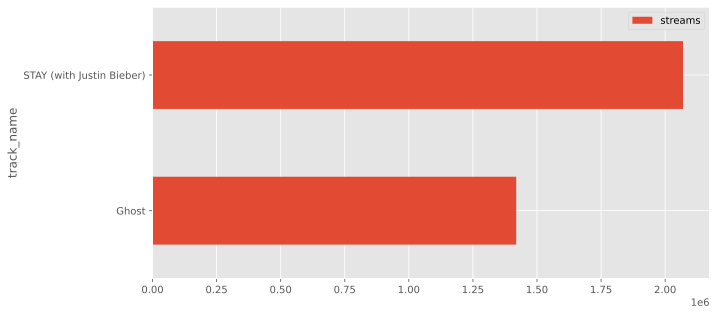

In [41]:
bieber.sort_values('streams').plot(kind='barh', x='track_name', y='streams');

## Fun demo 🎵

In [42]:
# Run this cell, don't worry about what it does.
def show_spotify(uri):
    code = uri[uri.rfind(':')+1:]
    src = f"https://open.spotify.com/embed/track/{code}"
    width = 400
    height = 75
    display(IFrame(src, width, height))

#### Let's find the URI of a song we care about.

In [43]:
charts

,track_name,artist_names,streams,uri
rank,,,,
1,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",7921301,spotify:track:3nqQXoyQOWXiESFLlDF1hG
2,I'm Good (Blue),"David Guetta, Bebe Rexha",4708193,spotify:track:4uUG5RXrOk84mYEfFvj3cK
3,As It Was,Harry Styles,4608998,spotify:track:4Dvkj6JhhA12EX05fT7y2e
...,...,...,...,...
198,There's Nothing Holdin' Me Back,Shawn Mendes,848871,spotify:track:7JJmb5XwzOO8jgpou264Ml
199,Heartless,Kanye West,841645,spotify:track:4EWCNWgDS8707fNSZ1oaA5
200,Mr. Brightside,The Killers,838350,spotify:track:003vvx7Niy0yvhvHt4a68B


In [53]:
favorite_song = 'As It Was'

In [54]:
song_uri = (charts
            [charts.get('track_name') == favorite_song]
            .get('uri')
            .iloc[0])
song_uri

'spotify:track:4Dvkj6JhhA12EX05fT7y2e'

Watch what happens! 🎶

In [55]:
show_spotify(song_uri)

Try it out yourself!

## Summary

### Summary

- Visualizations make it easy to extract patterns from datasets.
- There are two main types of variables: categorical and numerical.
- The types of the variables we're visualizing inform our choice of which type of visualization to use.
- Today, we looked at scatter plots, line plots, and bar charts.
- **Next time:** Histograms and overlaid plots.

### Let's discuss!

- As mentioned earlier, visualizations allow us to easily spot trends and communicate our results with others.
- Some visualizations make it more difficult to see the trend in data, by
    - Adding "[chart junk](https://eagereyes.org/criticism/chart-junk-considered-useful-after-all)."
    - Using misleading axes and sizes.

<center><img src="data/usefuljunk-monster.jpg" width=30%></center>

- In [**this thread on EdStem**](https://edstem.org/us/courses/29053/discussion/1903354), post some examples of particularly misleading or interesting visualizations! We'll share our favorites in class on Monday.